### Import libraries

In [1]:
import os

import torch
from torch.utils.data import DataLoader, Subset

import numpy as np
np.random.seed(42)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

/home/oturgut/miniconda3/envs/mae/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Get some embeddings

In [41]:
data_path = "/home/oturgut/sprai/mae_he/mae/output/fin/ecg/Diabetes/MM/globalPool/seed0/tiny/t2500/p1x100/ld0.75/dp0.2/smth0.2/wd0.1/m0.8/fin_b8_blr3e-6_b128_blr1e-5/embeddings/embeddings_31.pt"
labels_path = "/home/oturgut/sprai/data/preprocessed/ecg/labels_val_diabetes_all.pt"

In [42]:
embeddings = torch.load(data_path).to(device="cpu")
labels = torch.load(labels_path)

In [43]:
embeddings.shape, np.array(labels).shape

(torch.Size([6007, 384]), (6007,))

### Visualize the embeddings with t-SNE

In [44]:
tsne = TSNE(n_components=3, learning_rate='auto', init='random', verbose=0)
tsne_proj = tsne.fit_transform(embeddings)

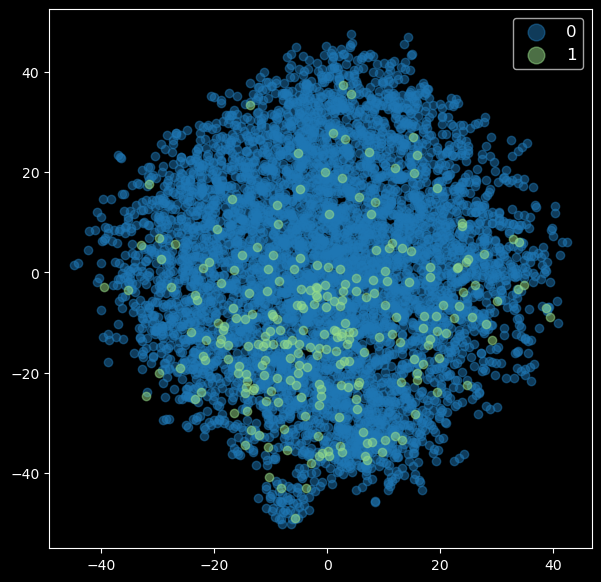

In [45]:
# 2D
cmap = matplotlib.cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(7, 7))

nb_classes = 2
for label in range(nb_classes):
    indices = np.array(labels)==label
    ax.scatter(tsne_proj[indices, 0], tsne_proj[indices, 1], c=np.array(cmap(label*5)).reshape(1, 4), label=label, alpha=0.5)

ax.legend(fontsize='large', markerscale=2)
plt.show()

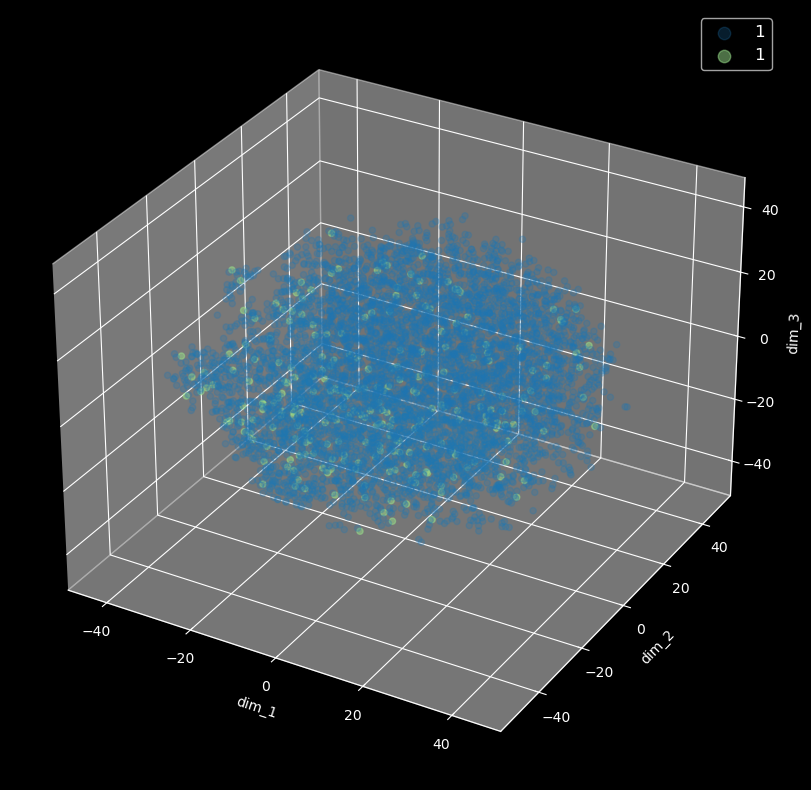

In [60]:
# 3D
cmap = matplotlib.cm.get_cmap('tab20') # for the colours

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

indices = np.array(labels)==0
ax.scatter(tsne_proj[indices, 2], tsne_proj[indices, 1], tsne_proj[indices, 0], c=np.array(cmap(0*5)).reshape(1, 4), label=label, alpha=0.25)

indices = np.array(labels)==1
ax.scatter(tsne_proj[indices, 2], tsne_proj[indices, 1], tsne_proj[indices, 0], c=np.array(cmap(1*5)).reshape(1, 4), label=label, alpha=0.5)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("dim_3")

ax.legend(fontsize='large', markerscale=2)
plt.show()

### Visualize the embeddings with PCA

How much information do the embeddings contain?

[0.10142352 0.0755664  0.05779896 0.05074052 0.04274519 0.03952437
 0.036997   0.03409767 0.03257164 0.03080284 0.02600572 0.02353456
 0.02150478 0.02098755 0.01925778 0.01798379 0.01639112 0.01445941
 0.01426999 0.01314755 0.01287703 0.01180862 0.01116901 0.01114595
 0.01027698 0.00948447 0.00864418 0.00841173 0.00804343 0.00786001
 0.00747946 0.0072005  0.00646772 0.00639574 0.00621377 0.00589505
 0.00556752 0.00528138 0.004716   0.00467075 0.00431295 0.00423607
 0.00402749 0.00369443 0.00350174 0.00341157 0.00332453 0.00312456
 0.00304878 0.00302424 0.00280044 0.00261731 0.002615   0.00239595
 0.00237475 0.00229934]
0.09977119134621559


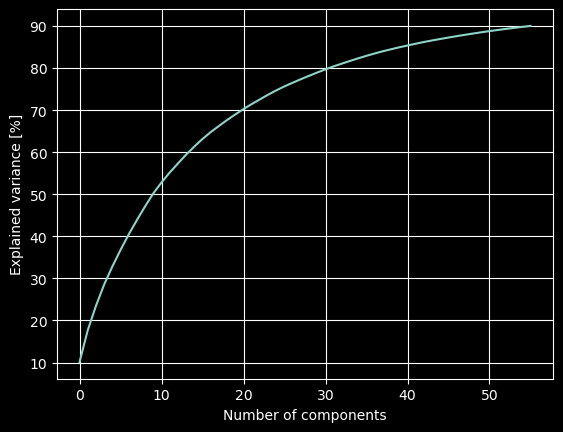

In [51]:
pca = PCA(n_components=0.9)
pca_proj = pca.fit_transform(embeddings)

print(pca.explained_variance_ratio_)
print(1-pca.explained_variance_ratio_.sum())

plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance [%]')
plt.show()

In [52]:
pca = PCA(n_components=3)
pca_proj = pca.fit_transform(embeddings)

print(pca.explained_variance_ratio_)
print(1-pca.explained_variance_ratio_.sum())

[0.10142352 0.0755664  0.05779896]
0.7652111233339322


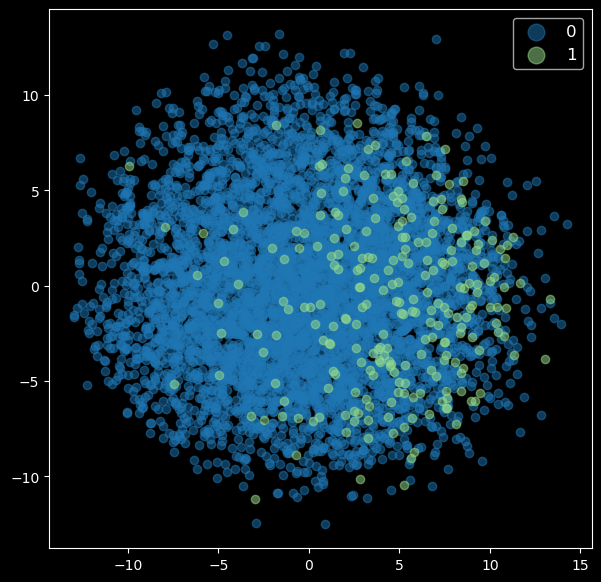

In [53]:
# 2D
cmap = matplotlib.cm.get_cmap('tab20') # for the colours

fig, ax = plt.subplots(figsize=(7, 7))

nb_classes = 2
for label in range(nb_classes):
    indices = np.array(labels)==label
    ax.scatter(pca_proj[indices, 0], pca_proj[indices, 1], c=np.array(cmap(label*5)).reshape(1, 4), label=label, alpha=0.5)

ax.legend(fontsize='large', markerscale=2)
plt.show()

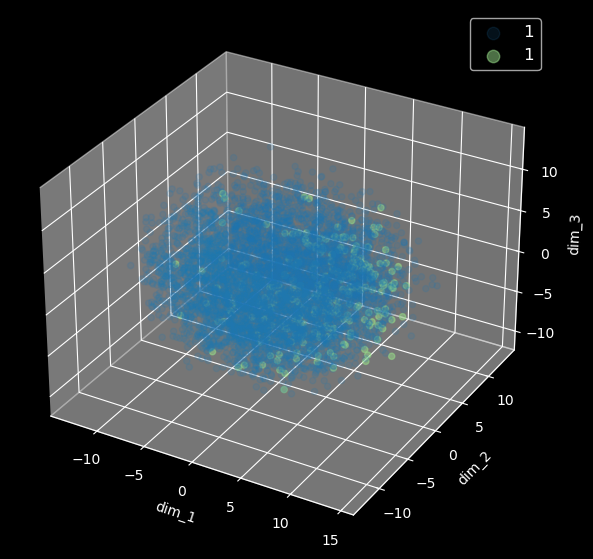

In [59]:
# 3D
cmap = matplotlib.cm.get_cmap('tab20') # for the colours

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, projection='3d')

indices = np.array(labels)==0
ax.scatter(pca_proj[indices, 0], pca_proj[indices, 1], pca_proj[indices, 2], c=np.array(cmap(0*5)).reshape(1, 4), label=label, alpha=0.15)

indices = np.array(labels)==1
ax.scatter(pca_proj[indices, 0], pca_proj[indices, 1], pca_proj[indices, 2], c=np.array(cmap(1*5)).reshape(1, 4), label=label, alpha=0.5)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("dim_3")

ax.legend(fontsize='large', markerscale=2)
plt.show()

### Visualize the embeddings with UMAP

In [61]:
umap = UMAP(n_components=3, metric='euclidean')
umap_proj = umap.fit_transform(embeddings)

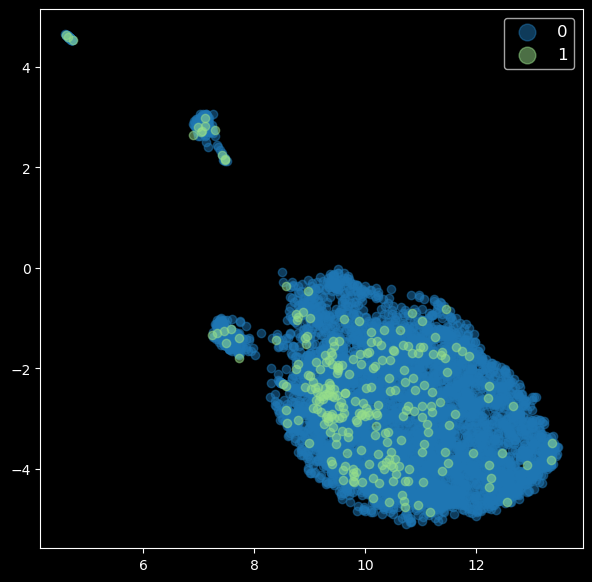

In [62]:
# 2D
cmap = matplotlib.cm.get_cmap('tab20') # for the colours

fig, ax = plt.subplots(figsize=(7, 7))

nb_classes = 2
for label in range(nb_classes):
    indices = np.array(labels)==label
    ax.scatter(umap_proj[indices, 0], umap_proj[indices, 1], c=np.array(cmap(label*5)).reshape(1, 4), label=label, alpha=0.5)

ax.legend(fontsize='large', markerscale=2)
plt.show()

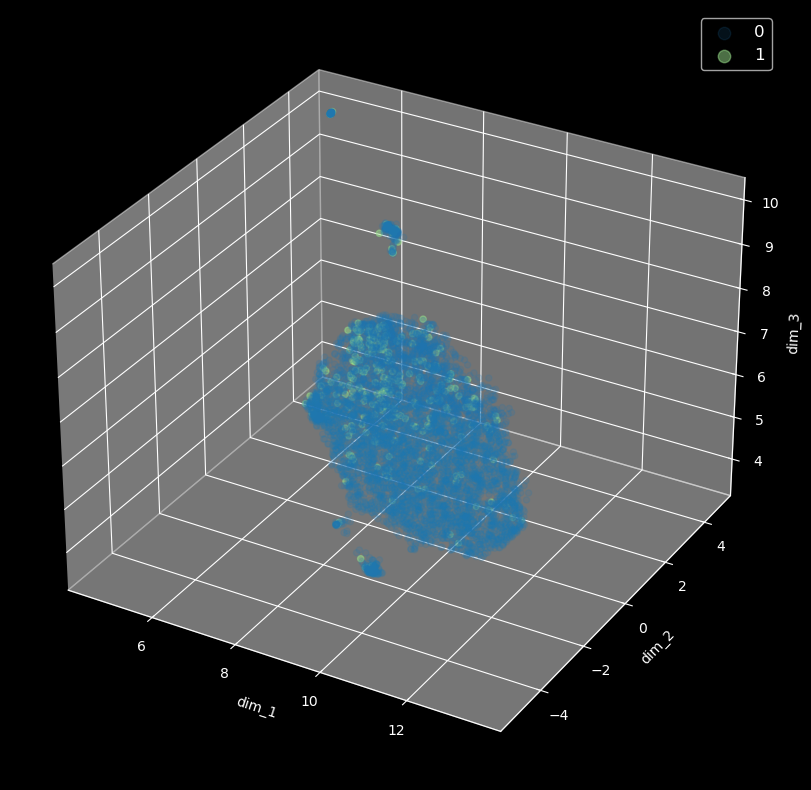

In [66]:
# 3D
cmap = matplotlib.cm.get_cmap('tab20') # for the colours

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

indices = np.array(labels)==0
ax.scatter(umap_proj[indices, 0], umap_proj[indices, 1], umap_proj[indices, 2], c=np.array(cmap(0*5)).reshape(1, 4), label=0, alpha=0.15)

indices = np.array(labels)==1
ax.scatter(umap_proj[indices, 0], umap_proj[indices, 1], umap_proj[indices, 2], c=np.array(cmap(1*5)).reshape(1, 4), label=1, alpha=0.5)

ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("dim_3")

ax.legend(fontsize='large', markerscale=2)
plt.show()